In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tryig to set the target variable as the fatal or non fatal accindents in France metropolitan area
#Step 2/ Pre-processing and feature engineering : Deadline Friday, 14th of July
#Following the observations made in the previous step, you will have to clean your dataset and perform the pre-processing steps.
#If necessary, you will have to transform and/or add features and enrich your dataset.
#The objective at the end of this step is to have a dataset ready to perform in-depth analysis and/or modeling using Machine (and Deep) Learning.

In [2]:
df = pd.read_csv("./data/merged_tables.csv", index_col=0)

df.info()


C:\Users\Tiago\AppData\Local\Temp\ipykernel_9256\3491915842.py:1: DtypeWarning: Columns (13,19,25,33,40,41,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/merged_tables.csv", index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 416924 entries, 201900000001 to 201800049520
Data columns (total 60 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_vehicule    347617 non-null  float64
 1   num_veh        416924 non-null  object 
 2   place          412775 non-null  float64
 3   catu           416924 non-null  int64  
 4   grav           416924 non-null  int64  
 5   sexe           416924 non-null  int64  
 6   an_nais        413902 non-null  float64
 7   trajet         416863 non-null  float64
 8   secu1          347617 non-null  float64
 9   secu2          347617 non-null  float64
 10  secu3          347617 non-null  float64
 11  locp           414798 non-null  float64
 12  actp           414793 non-null  object 
 13  etatp          414791 non-null  float64
 14  secu           67378 non-null   float64
 15  an             416924 non-null  int64  
 16  mois           416924 non-null  int64  
 17  jour        

In [3]:
df['an'].describe()

count    416924.000000
mean       2018.555504
std           3.765379
min        2005.000000
25%        2019.000000
50%        2020.000000
75%        2021.000000
max        2021.000000
Name: an, dtype: float64

In [4]:
#filter the data from France metroplotian area only
Metro_df = df[df['gps'] == 'M']

Metro_df.head(5)

,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,...,catv,occutc,obs,obsm,choc,manv,motor,date,is_holiday,holiday
Num_Acc,,,,,,,,,,,,,,,,,,,,,
201900000001,138306524.0,B01,2.0,2,4,2,2002.0,0.0,1.0,0.0,...,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30,False,NaN
201900000001,138306524.0,B01,1.0,1,4,2,1993.0,5.0,1.0,0.0,...,7,NaN,0.0,2.0,5.0,23.0,1.0,2019-11-30,False,NaN
201900000001,138306525.0,A01,1.0,1,1,1,1959.0,0.0,1.0,0.0,...,17,NaN,1.0,0.0,3.0,11.0,1.0,2019-11-30,False,NaN
201900000002,138306523.0,A01,1.0,1,4,2,1994.0,0.0,1.0,0.0,...,7,NaN,4.0,0.0,1.0,0.0,1.0,2019-11-30,False,NaN
201900000003,138306520.0,A01,1.0,1,1,1,1996.0,0.0,1.0,0.0,...,7,NaN,0.0,2.0,1.0,2.0,1.0,2019-11-28,False,NaN


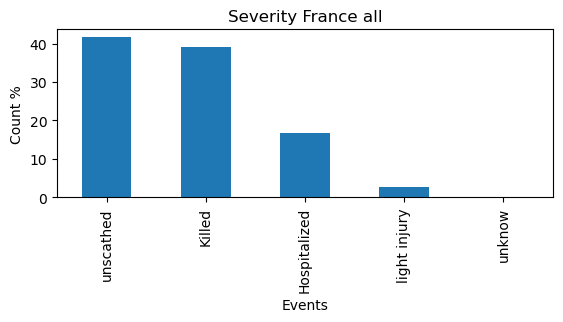

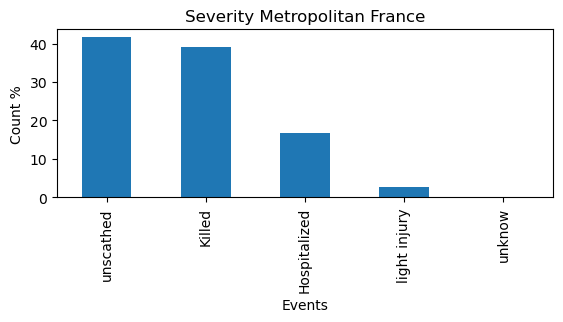

In [8]:
# exploring a possible target variable
#severity
event_counts = df['grav'].value_counts()
event_percentages = (event_counts / event_counts.sum()) * 100
plt.subplot(2,1,1)
event_percentages.plot.bar()
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity France all')
# Display the plot
plt.show()



event_counts_M = Metro_df['grav'].value_counts()
event_percentages_M = (event_counts_M / event_counts_M.sum()) * 100
plt.subplot(2,1,2)
event_percentages.plot.bar()
#labels = ['unscathed','Killed','Hospitalized','light injury']
labels = ['unscathed','Killed','Hospitalized','light injury','unknow']
# Add labels and title to the plot
plt.xticks(range(len(event_percentages_M)), labels)
plt.xlabel('Events')
plt.ylabel('Count %')
plt.title('Severity Metropolitan France')
# Display the plot
plt.show()


In [9]:
# create a new variable for the severity ['Grav'] of accidents ( fatal, non-fatal) as a possible target variable
# a new binary variable 'fatality' based on 'severity'
Metro_df['fatal'] = np.where(Metro_df['grav'].isin([1, 3, 4]), 0, 1)



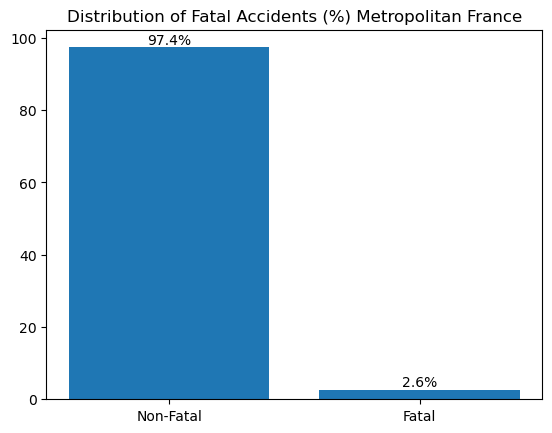

In [10]:
# explorig the new variable 
percentage_distribution = Metro_df['fatal'].value_counts(normalize=True) * 100

# Create a bar plot
plt.bar(percentage_distribution.index, percentage_distribution.values)

# Set the x-axis tick labels
plt.xticks(percentage_distribution.index)
plt.xticks(percentage_distribution.index, ['Non-Fatal', 'Fatal'])
plt.title('Distribution of Fatal Accidents (%) Metropolitan France')
# Show labels on top of bars
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.show()

In [11]:
# exploting the department of the cities in France Metropolitan area 
Metro_df['dep']

Num_Acc
201900000001    93
201900000001    93
201900000001    93
201900000002    93
201900000003    92
                ..
201800049474    10
201800049478    10
201800049478    10
201800049478    10
201800049520    10
Name: dep, Length: 416924, dtype: int64

In [12]:
Metro_df['dep'] = Metro_df['dep'].astype(int)

Metro_df['dep'].describe()


count    416924.000000
mean         55.792413
std          28.107714
min           1.000000
25%          33.000000
50%          60.000000
75%          77.000000
max          95.000000
Name: dep, dtype: float64

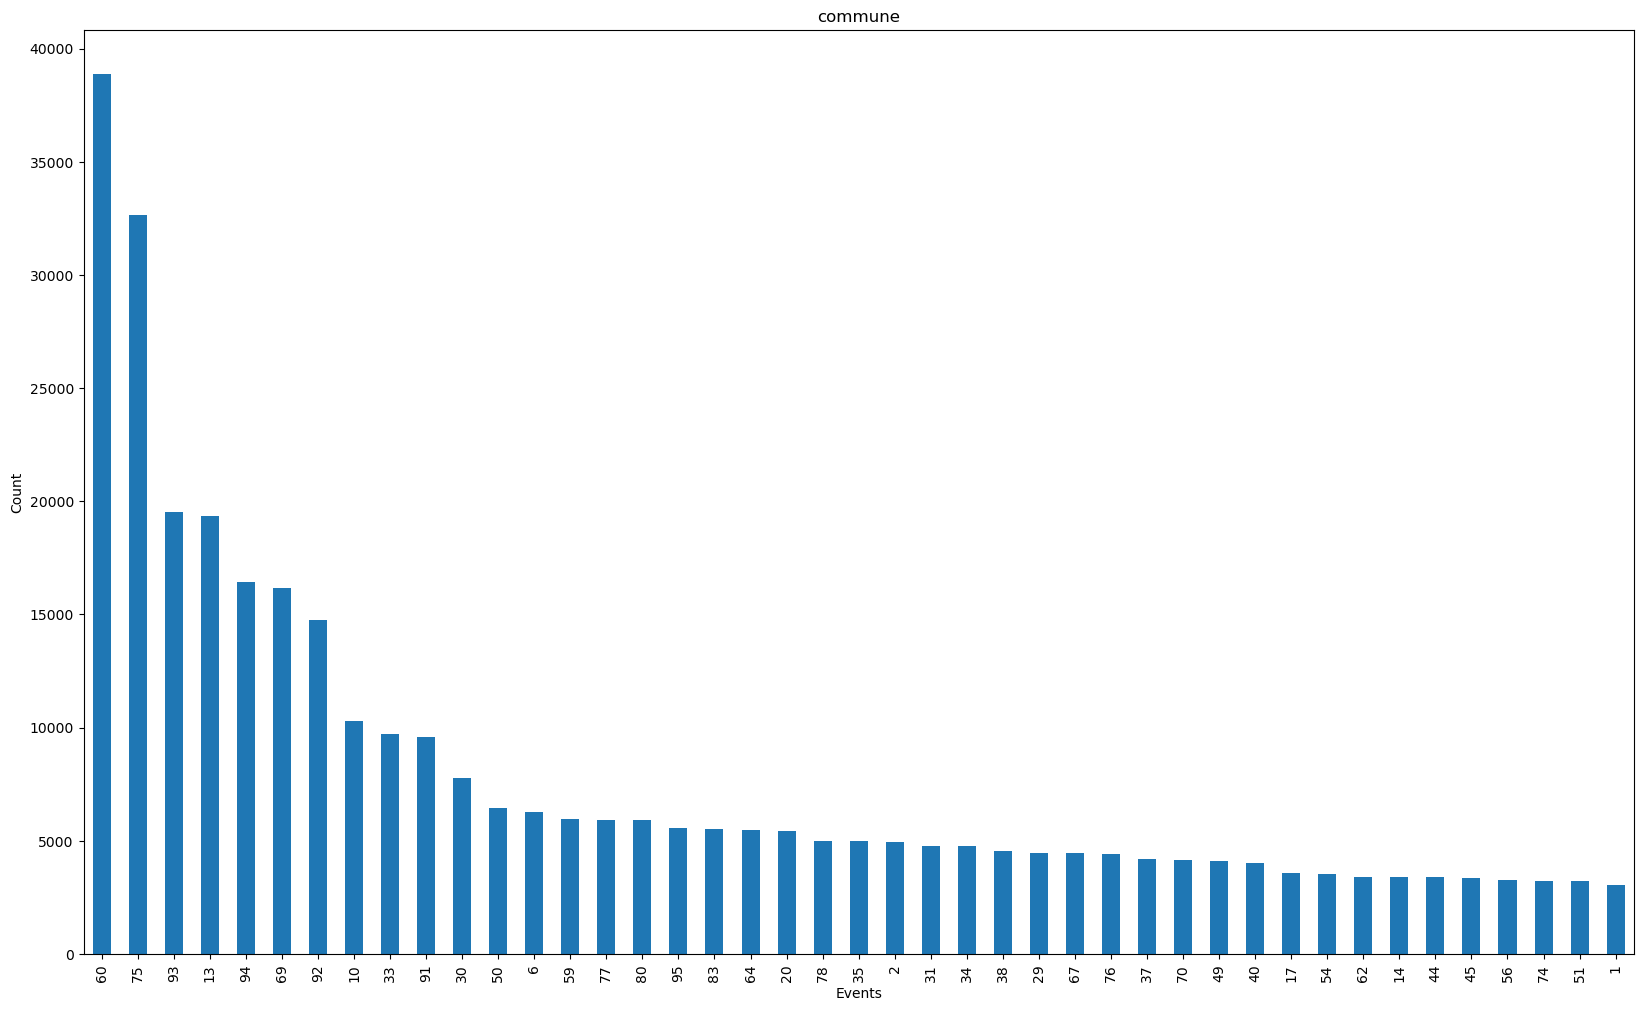

In [13]:
plt.figure(figsize=(20,12))
event_counts = Metro_df['dep'].value_counts()
event_counts_filtered = event_counts[event_counts > 3000]

event_counts_filtered.plot.bar()

plt.xticks(rotation=90)
plt.xlabel('Events')
plt.ylabel('Count')
plt.title('commune')
# Display the plot
plt.show()

In [14]:
Metro_df['jour'].describe()

count    416924.000000
mean         15.683350
std           8.757234
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: jour, dtype: float64

In [15]:
Metro_df['datetime'] = pd.to_datetime(
    Metro_df['jour'].astype(str) + '-' +
    Metro_df['mois'].astype(str) + '-' +
    Metro_df['an'].astype(str),
    format='%d-%m-%Y'
)



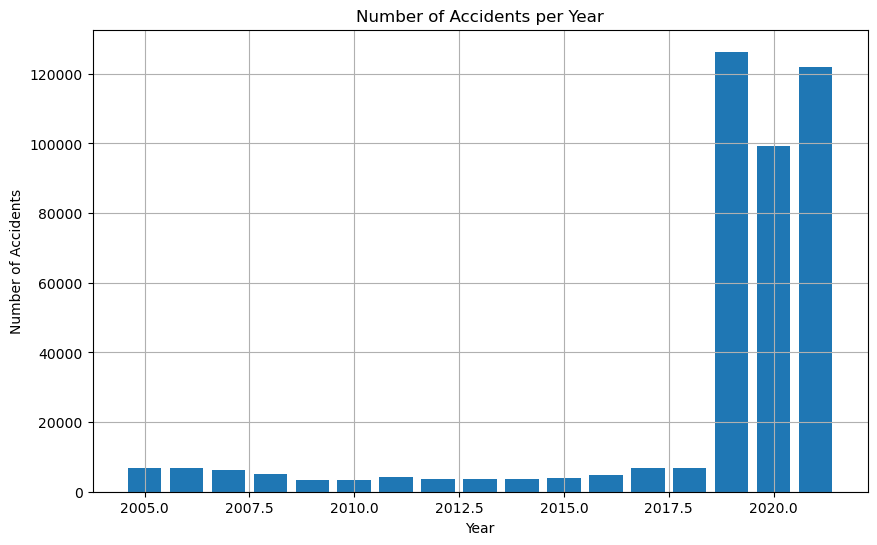

In [16]:
Metro_df['year'] = Metro_df['datetime'].dt.year # new

# Group the data by year and count the occurrences
accidents_per_year = Metro_df['year'].value_counts().sort_index()

# Plot the number of accidents per year
plt.figure(figsize=(10, 6))
plt.bar(accidents_per_year.index, accidents_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Year')
plt.grid(True)
plt.show()

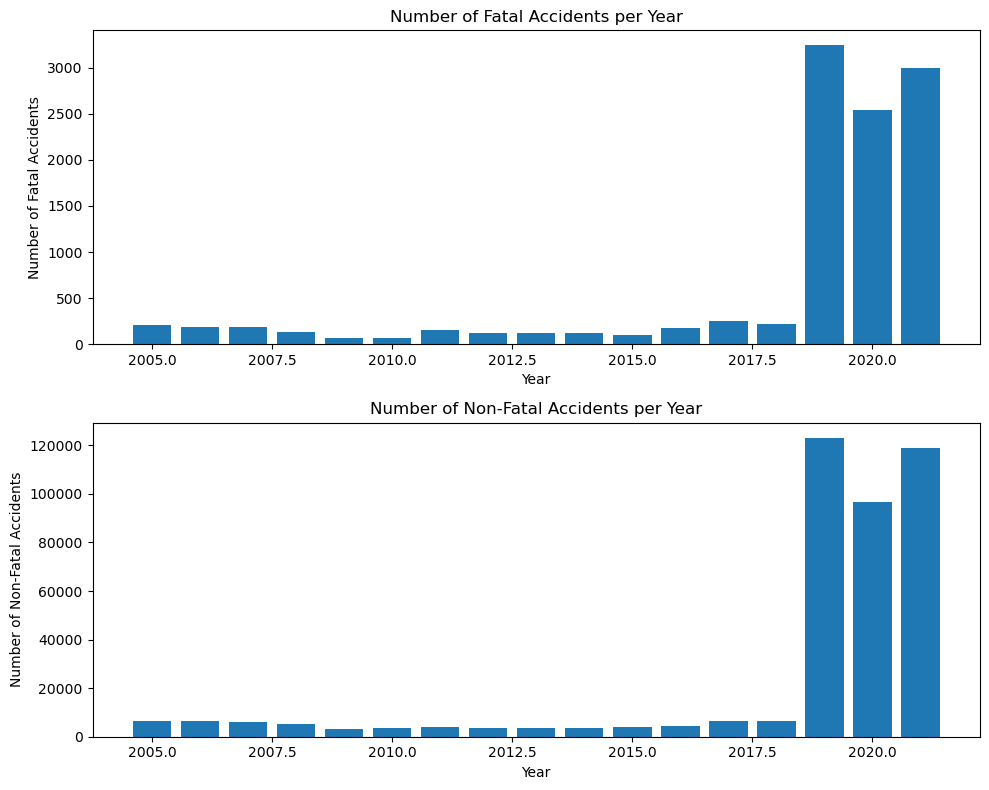

In [17]:
fatal_counts = Metro_df[Metro_df['fatal'] == 1]['year'].value_counts().sort_index()

# Group the data by year and count the occurrences for non-fatal accidents
non_fatal_counts = Metro_df[Metro_df['fatal'] == 0]['year'].value_counts().sort_index()

# Create subplots for fatal and non-fatal accidents
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the number of fatal accidents per year
ax1.bar(fatal_counts.index, fatal_counts.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Fatal Accidents')
ax1.set_title('Number of Fatal Accidents per Year')

# Plot the number of non-fatal accidents per year
ax2.bar(non_fatal_counts.index, non_fatal_counts.values)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Non-Fatal Accidents')
ax2.set_title('Number of Non-Fatal Accidents per Year')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



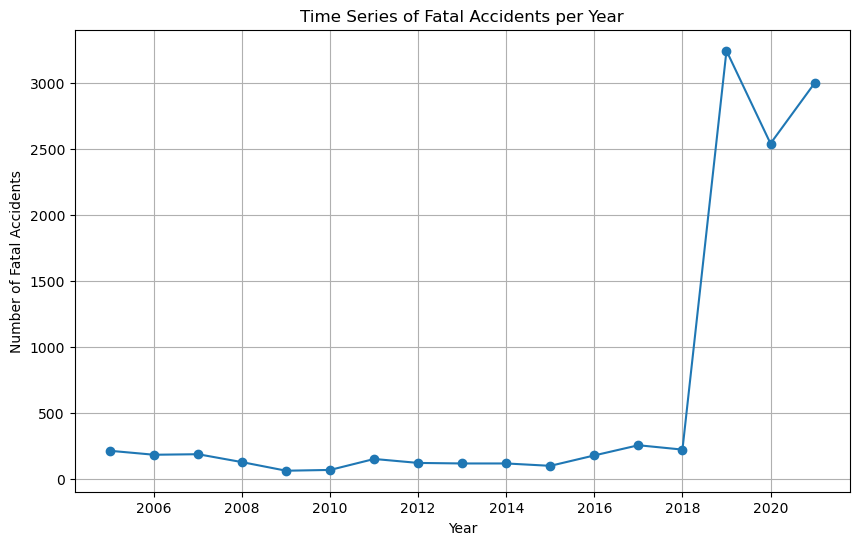

In [18]:
fatal_counts = Metro_df[Metro_df['fatal'] == 1]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents per Year')
plt.grid(True)
plt.show()

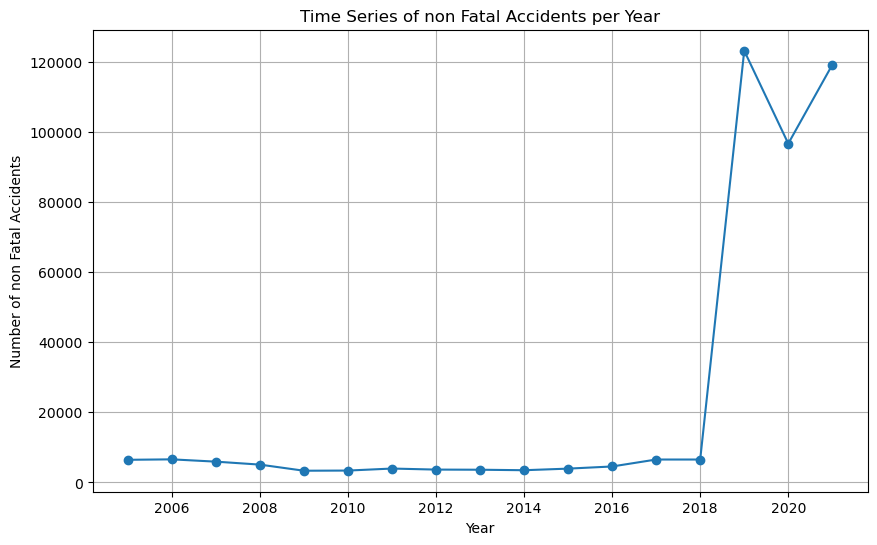

In [19]:
fatal_counts = Metro_df[Metro_df['fatal'] == 0]['year'].value_counts().sort_index()

# Plot the time series of fatal accidents per year
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents per Year')
plt.grid(True)
plt.show()

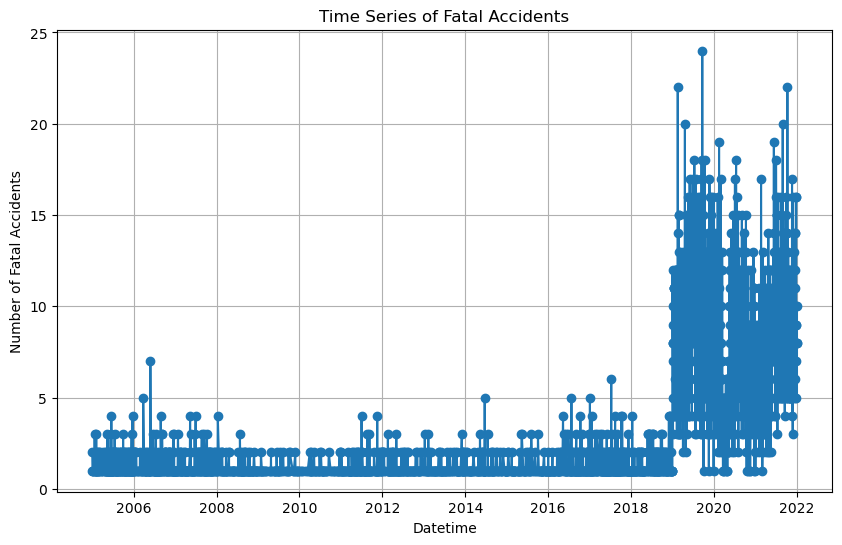

In [20]:
#time series of fatal accidents

fatal_counts = Metro_df[Metro_df['fatal'] == 1]['datetime'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents')
plt.grid(True)
plt.show()

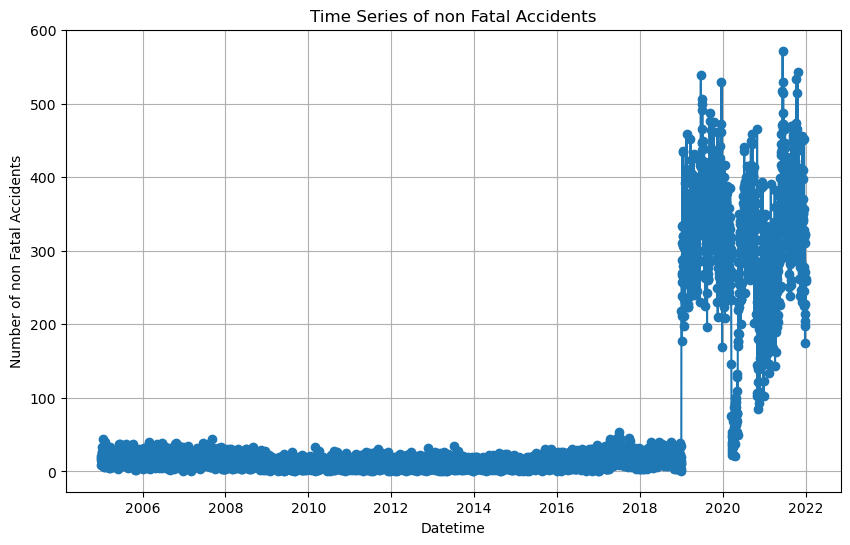

In [21]:
#time series of non fatal accidents
fatal_counts = Metro_df[Metro_df['fatal'] == 0]['datetime'].value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(fatal_counts.index, fatal_counts.values, marker='o')
plt.xlabel('Datetime')
plt.ylabel('Number of non Fatal Accidents')
plt.title('Time Series of non Fatal Accidents')
plt.grid(True)
plt.show()



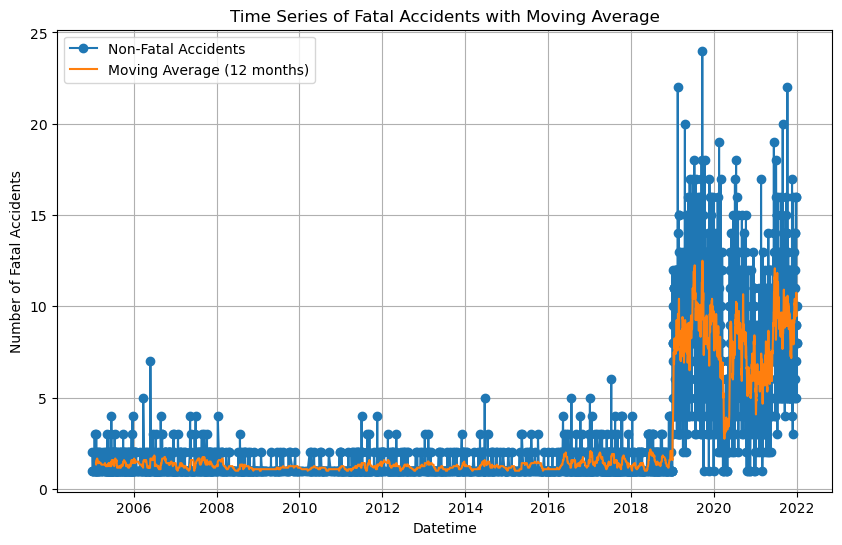

In [22]:
#Filter the DataFrame for fatal accidents
non_fatal_counts = Metro_df[Metro_df['fatal'] == 1]['datetime'].value_counts().sort_index()

# Calculate the moving average with a window size =  12 months
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Fatal Accidents')
plt.title('Time Series of Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()

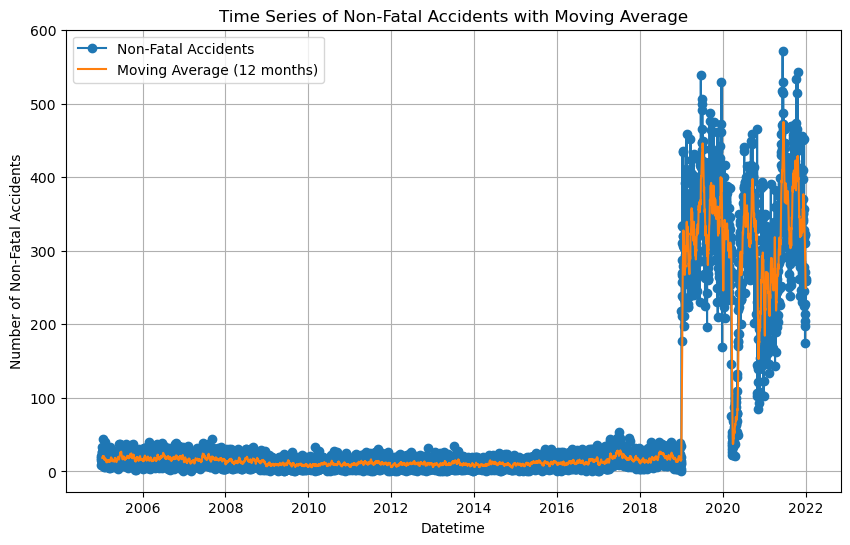

In [23]:
#Filter the DataFrame for non-fatal accidents
non_fatal_counts = Metro_df[Metro_df['fatal'] == 0]['datetime'].value_counts().sort_index()

# Calculate the moving average with a window size of your choice (e.g., 12 months)
moving_average = non_fatal_counts.rolling(window=12).mean()

# Plot the time series and the moving average
plt.figure(figsize=(10, 6))
plt.plot(non_fatal_counts.index, non_fatal_counts.values, marker='o', label='Non-Fatal Accidents')
plt.plot(moving_average.index, moving_average.values, label='Moving Average (12 months)')
plt.xlabel('Datetime')
plt.ylabel('Number of Non-Fatal Accidents')
plt.title('Time Series of Non-Fatal Accidents with Moving Average')
plt.grid(True)
plt.legend()
plt.show()
# strange increase